In [4]:
import pandas as pd
import os

In [22]:
df_new = pd.read_csv('../data/transcriptions.csv')
df_new.head()

,audio_file,ground_truth,predicted_text,wer
0,../data/audio\common_voice_en_42594358.mp3,Political positions inside and outside the par...,Political positions inside and outside the par...,0.000000
1,../data/audio\common_voice_en_42216083.mp3,One area where training specific behavior has ...,One area where training-specific behavior has ...,0.153846
2,../data/audio\common_voice_en_42466107.mp3,"However, the series was launched without this ...","However, the series was launched without this ...",0.000000
3,../data/audio\common_voice_en_42511436.mp3,He later commented that he did not support the...,He later commented that he did not support the...,0.000000
4,../data/audio\common_voice_en_42511438.mp3,The truth will come out one day as it happens ...,The truth will come out one day as it happens ...,0.000000


In [21]:
# Load both CSVs
meta = pd.read_csv('../data/metadata.csv')
transcripts = pd.read_csv('../data/transcriptions.csv')

# Extract just the filename from path to merge on it
meta['filename'] = meta['path'].apply(lambda p: os.path.basename(p))
transcripts['filename'] = transcripts['audio_file'].apply(lambda p: os.path.basename(p))

# Merge on filename
df = pd.merge(meta, transcripts, on='filename')


In [23]:
df.head()

,path,sentence,accent,age,gender,filename,audio_file,ground_truth,predicted_text,wer
0,common_voice_en_42594358.mp3,Political positions inside and outside the par...,United States English,thirties,female_feminine,common_voice_en_42594358.mp3,../data/audio\common_voice_en_42594358.mp3,Political positions inside and outside the par...,Political positions inside and outside the par...,0.000000
1,common_voice_en_42216083.mp3,One area where training specific behavior has ...,United States English,fourties,male_masculine,common_voice_en_42216083.mp3,../data/audio\common_voice_en_42216083.mp3,One area where training specific behavior has ...,One area where training-specific behavior has ...,0.153846
2,common_voice_en_42466107.mp3,"However, the series was launched without this ...",United States English,teens,female_feminine,common_voice_en_42466107.mp3,../data/audio\common_voice_en_42466107.mp3,"However, the series was launched without this ...","However, the series was launched without this ...",0.000000
3,common_voice_en_42511436.mp3,He later commented that he did not support the...,United States English,sixties,female_feminine,common_voice_en_42511436.mp3,../data/audio\common_voice_en_42511436.mp3,He later commented that he did not support the...,He later commented that he did not support the...,0.000000
4,common_voice_en_42511438.mp3,The truth will come out one day as it happens ...,United States English,sixties,female_feminine,common_voice_en_42511438.mp3,../data/audio\common_voice_en_42511438.mp3,The truth will come out one day as it happens ...,The truth will come out one day as it happens ...,0.000000


In [20]:
df['gender'].value_counts()

gender
female_feminine       132
male_masculine         41
do_not_wish_to_say      4
Name: count, dtype: int64

In [9]:
# Bias by gender
df.groupby('gender')['wer'].mean().sort_values()

gender
do_not_wish_to_say    0.000000
female_feminine       0.102653
male_masculine        0.106536
Name: wer, dtype: float64

In [34]:
df['accent'].value_counts()

accent
nigerian accent                                      93
United States English                                44
Canadian English                                     31
British English / Received Pronunciation (RP)         6
India and South Asia (India, Pakistan, Sri Lanka)     3
Name: count, dtype: int64

In [11]:
# Bias by accent
df.groupby('accent')['wer'].mean().sort_values()

accent
United States English                                0.039937
British English / Received Pronunciation (RP)        0.047619
India and South Asia (India, Pakistan, Sri Lanka)    0.083333
Canadian English                                     0.118658
nigerian accent                                      0.128461
Name: wer, dtype: float64

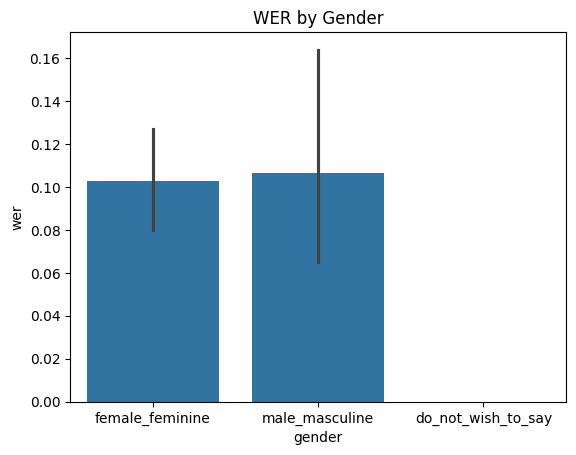

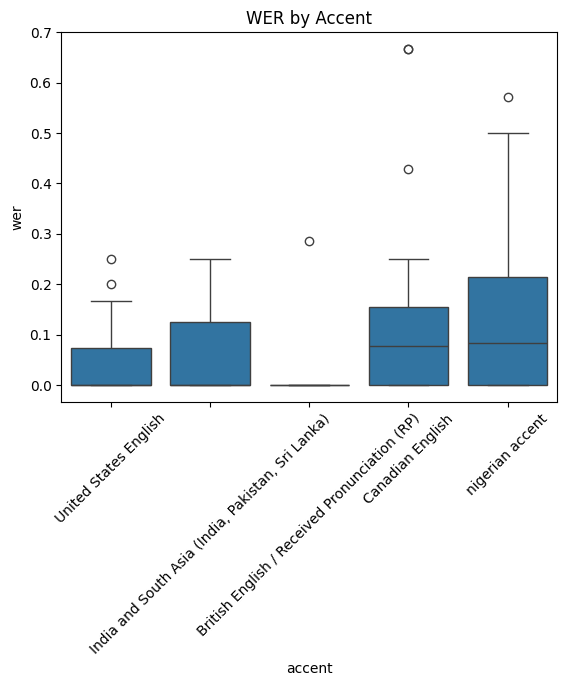

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df, x='gender', y='wer')
plt.title("WER by Gender")
plt.show()

sns.boxplot(data=df, x='accent', y='wer')
plt.xticks(rotation=45)
plt.title("WER by Accent")
plt.show()


In [ ]:
# Average WER per group
grouped_stats = df.groupby(['gender', 'accent']).agg(
    avg_wer=('wer', 'mean'),
    std_wer=('wer', 'std'),
    count=('wer', 'count')
).reset_index()


# Optional: Sort by avg_wer descending to highlight high-error groups
grouped_stats.sort_values(by='avg_wer', ascending=False)


,gender,accent,avg_wer,std_wer,count
6,male_masculine,United States English,0.153846,NaN,1
2,female_feminine,nigerian accent,0.128461,0.151168,93
4,male_masculine,Canadian English,0.118658,0.176158,31
5,male_masculine,"India and South Asia (India, Pakistan, Sri Lanka)",0.083333,0.144338,3
3,male_masculine,British English / Received Pronunciation (RP),0.047619,0.116642,6
1,female_feminine,United States English,0.041113,0.066660,39
0,do_not_wish_to_say,United States English,0.000000,0.000000,4


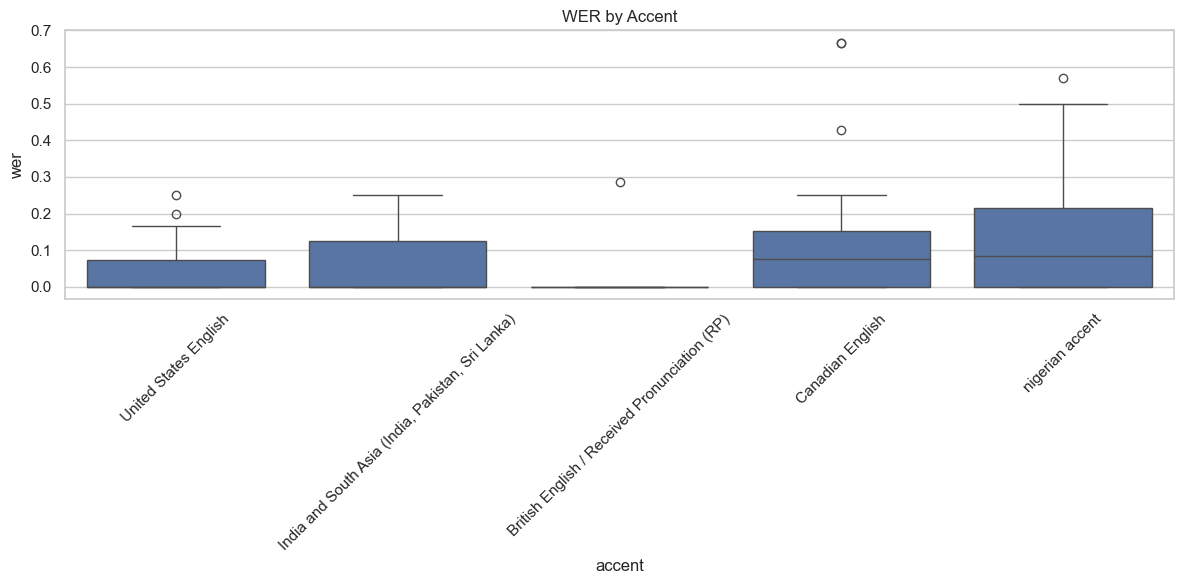

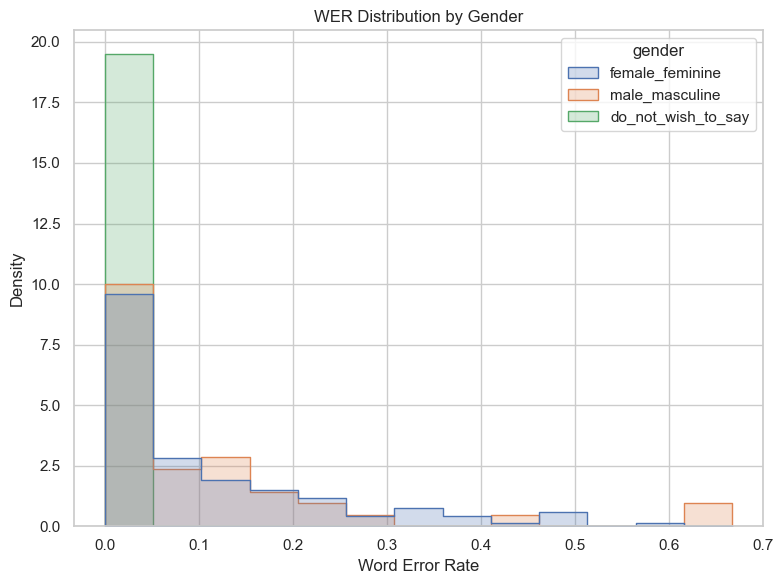

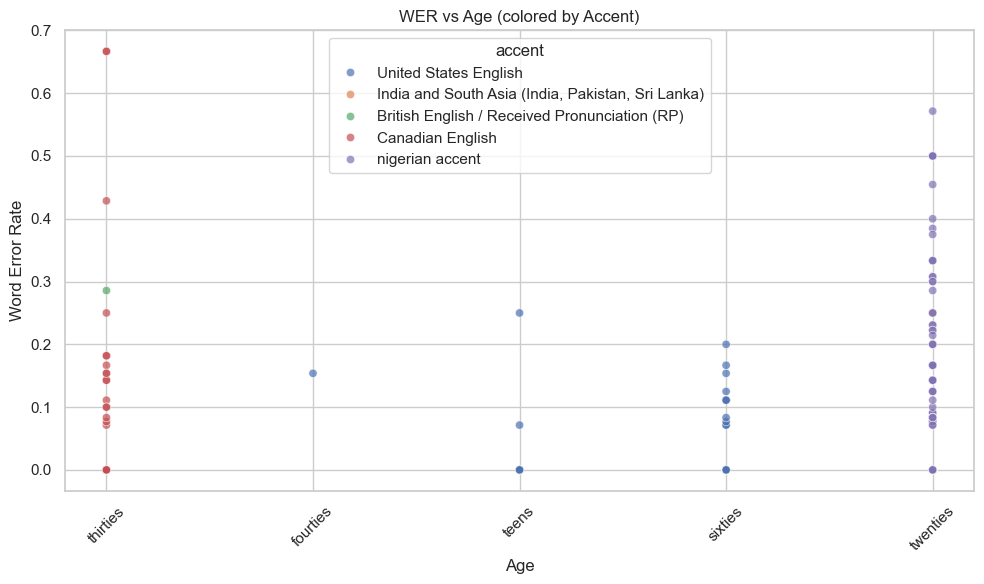

In [32]:
# Set up visual style
sns.set(style="whitegrid")

# 📊 Boxplot of WER by Accent
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='accent', y='wer')
plt.title("WER by Accent")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 📊 WER distribution per Gender
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='wer', hue='gender', element='step', stat='density', common_norm=False)
plt.title("WER Distribution by Gender")
plt.xlabel("Word Error Rate")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

# 📊 Scatter plot of WER vs Age colored by Accent
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='wer', hue='accent', alpha=0.7)
plt.title("WER vs Age (colored by Accent)")
plt.xlabel("Age")
plt.ylabel("Word Error Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()